In [1]:
import torch
import torch.nn as nn
import numpy as np
from functools import partial

from torch.optim.lr_scheduler import StepLR

from model import NN
from functions import gaussian_loss_function
from train import training_routine, testing_routine
from visuals import plot_transformed_grid_and_density, compute_gaussian_density, compute_uniform_circle_density

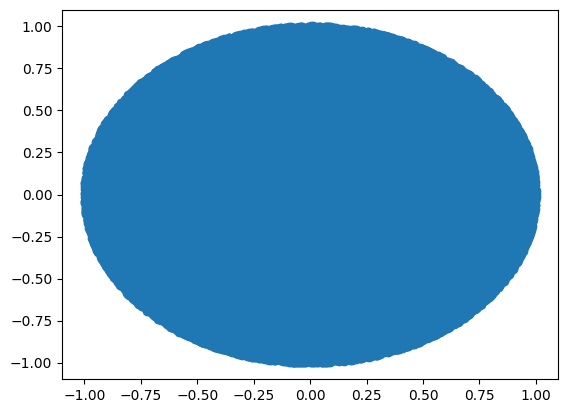

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

torch.set_default_dtype(torch.float64)
torch.manual_seed(2)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

def generate_ellipse(max_num = 10000, scale=(0.5,0.2), device='cpu'):
    data = (torch.rand((max_num,2), device=device)-0.5)*2
    dist = torch.sum(torch.square(data),axis=1)
    data = data[torch.where(dist <= 1)]
    data *= torch.tensor(scale, device=device)
    return data

training_set = generate_ellipse(max_num=100000, scale=(1,1.), device=device)
validation_set = generate_ellipse(max_num=10000, scale=(1.,1), device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [3]:
model_circle = NN(num_coupling_layers=30, split_size_x1=1, nn_size=(1, 10)).to(device)


In [4]:
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [10]:
%%time

for epoch in range(num_epoch):
    training_routine(model_circle, train_loader, optimizer, gaussian_loss_function) 
    print(testing_routine(model_circle, validation_loader, gaussian_loss_function))
    scheduler.step()

77it [00:10,  7.54it/s]
62it [00:01, 31.68it/s]


tensor(4364.7000, device='cuda:0')


77it [00:10,  7.38it/s]
62it [00:02, 20.77it/s]


tensor(4211.4559, device='cuda:0')


77it [00:12,  6.15it/s]
62it [00:02, 20.81it/s]


tensor(4199.0969, device='cuda:0')


77it [00:12,  6.11it/s]
62it [00:02, 20.74it/s]


tensor(4252.3458, device='cuda:0')


77it [00:12,  6.08it/s]
62it [00:03, 20.63it/s]


tensor(4164.1870, device='cuda:0')


77it [00:12,  6.06it/s]
62it [00:02, 23.03it/s]


tensor(4222.4158, device='cuda:0')


77it [00:11,  6.56it/s]
62it [00:02, 22.29it/s]


tensor(4156.1936, device='cuda:0')


77it [00:11,  6.50it/s]
62it [00:03, 20.32it/s]


tensor(4106.0591, device='cuda:0')


77it [00:11,  6.70it/s]
62it [00:02, 22.79it/s]


tensor(4014.7966, device='cuda:0')


77it [00:11,  6.67it/s]
62it [00:02, 22.87it/s]


tensor(3991.6733, device='cuda:0')


77it [00:10,  7.44it/s]
62it [00:02, 23.09it/s]


tensor(3949.0802, device='cuda:0')


77it [00:09,  8.27it/s]
62it [00:01, 31.86it/s]


tensor(4071.3455, device='cuda:0')


77it [00:09,  8.24it/s]
62it [00:01, 31.17it/s]


tensor(3898.8654, device='cuda:0')


77it [00:09,  8.14it/s]
62it [00:01, 31.94it/s]


tensor(3854.0366, device='cuda:0')


77it [00:09,  7.98it/s]
62it [00:01, 32.26it/s]


tensor(3891.2171, device='cuda:0')


77it [00:09,  8.15it/s]
62it [00:01, 31.08it/s]


tensor(3832.8358, device='cuda:0')


77it [00:09,  8.02it/s]
62it [00:01, 33.37it/s]


tensor(3871.3999, device='cuda:0')


77it [00:09,  7.77it/s]
62it [00:02, 23.16it/s]


tensor(3917.7853, device='cuda:0')


77it [00:09,  7.87it/s]
62it [00:02, 30.94it/s]


tensor(3996.9501, device='cuda:0')


77it [00:10,  7.39it/s]
62it [00:02, 20.83it/s]

tensor(3882.6363, device='cuda:0')
CPU times: total: 5min 5s
Wall time: 4min 25s


0

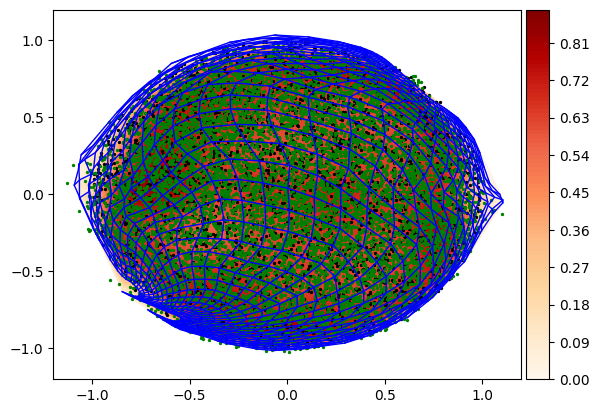

In [14]:
scale=1.2
factor=3

sampling_data = torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model_circle, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-1*scale,1*scale), y_lim=(-1*scale,1*scale),
                                density_function=compute_gaussian_density)

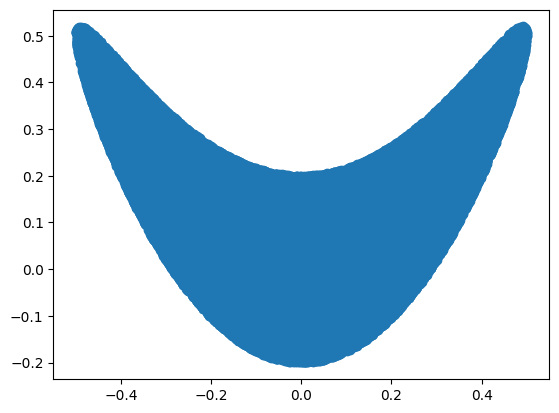

In [15]:
def generate_banana(n=100000, device=device):
    train_loader = generate_ellipse(n, device=device)
    train_loader[:, 1] = train_loader[:,1] + 2*train_loader[:,0]**2
    return train_loader
training_set = generate_banana(n=100000, device=device)
validation_set = generate_banana(n=10000, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [16]:
model_banana = NN(num_coupling_layers=30, split_size_x1=1, nn_size=(1, 10)).to(device)


In [17]:
optimizer = torch.optim.SGD(model_banana.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [20]:
%%time

for epoch in range(num_epoch):
    training_routine(model_banana, train_loader, optimizer, gaussian_loss_function) 
    print(testing_routine(model_banana, validation_loader, gaussian_loss_function))
    scheduler.step()

77it [00:09,  8.22it/s]
62it [00:01, 32.55it/s]


tensor(-13703.2499, device='cuda:0')


77it [00:09,  8.03it/s]
62it [00:01, 32.06it/s]


tensor(-13206.5259, device='cuda:0')


77it [00:09,  8.17it/s]
62it [00:01, 31.09it/s]


tensor(-13858.2898, device='cuda:0')


77it [00:09,  8.11it/s]
62it [00:02, 30.88it/s]


tensor(-13764.7668, device='cuda:0')


77it [00:09,  8.39it/s]
62it [00:02, 28.44it/s]


tensor(-13383.5501, device='cuda:0')


77it [00:09,  8.30it/s]
62it [00:02, 21.13it/s]


tensor(-13419.7974, device='cuda:0')


77it [00:12,  6.25it/s]
62it [00:03, 19.88it/s]


tensor(-13650.0754, device='cuda:0')


77it [00:12,  6.18it/s]
62it [00:03, 19.59it/s]


tensor(-13763.7568, device='cuda:0')


77it [00:12,  6.27it/s]
62it [00:02, 23.66it/s]


tensor(-13967.9315, device='cuda:0')


77it [00:09,  8.28it/s]
62it [00:02, 29.09it/s]


tensor(-13977.2553, device='cuda:0')


77it [00:09,  7.94it/s]
62it [00:02, 30.00it/s]


tensor(-14030.2152, device='cuda:0')


77it [00:09,  7.87it/s]
62it [00:02, 27.83it/s]


tensor(-13122.8512, device='cuda:0')


77it [00:09,  7.88it/s]
62it [00:02, 29.15it/s]


tensor(-13974.0277, device='cuda:0')


77it [00:09,  7.71it/s]
62it [00:02, 28.13it/s]


tensor(-13702.2298, device='cuda:0')


77it [00:09,  7.76it/s]
62it [00:02, 28.93it/s]


tensor(-13955.3932, device='cuda:0')


77it [00:10,  7.66it/s]
62it [00:02, 29.48it/s]


tensor(-13960.9711, device='cuda:0')


77it [00:10,  7.70it/s]
62it [00:02, 28.97it/s]


tensor(-13826.1418, device='cuda:0')


77it [00:09,  7.77it/s]
62it [00:02, 27.52it/s]


tensor(-14186.5823, device='cuda:0')


77it [00:09,  8.01it/s]
62it [00:02, 27.57it/s]


tensor(-14113.1588, device='cuda:0')


77it [00:09,  7.86it/s]
62it [00:02, 29.87it/s]

tensor(-14117.5289, device='cuda:0')
CPU times: total: 4min 53s
Wall time: 4min 6s


0

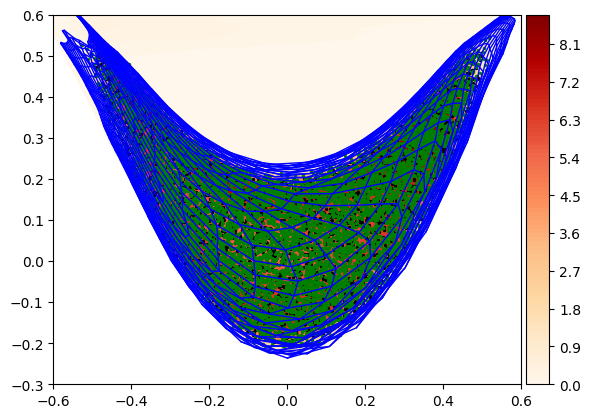

In [29]:
scale=1.2
factor=4

sampling_data = torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model_banana, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-0.5*scale,0.5*scale), y_lim=(-0.25*scale,0.5*scale),
                                density_function=compute_gaussian_density)

In [30]:
sampling_data = generate_ellipse(10900, (1, 1), device=device) 

with torch.no_grad():
    transformed = model_banana(model_circle(sampling_data), reverse=True)

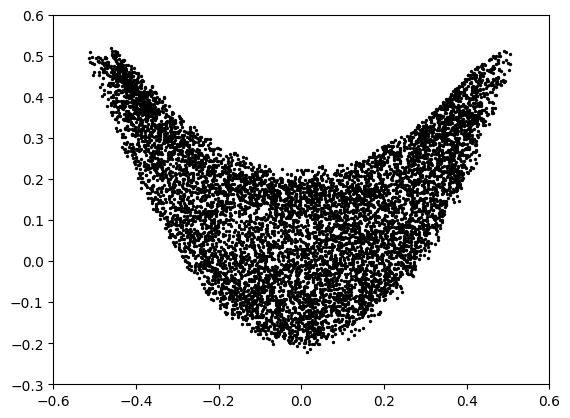

In [32]:
transformed = transformed.detach().to('cpu')

factor = 1
scale = 1.2

x_range=(-factor, factor)
y_range=(-factor, factor)
x_lim=(-0.5*scale,0.5*scale)
y_lim=(-0.25*scale,0.5*scale)

fig, ax = plt.subplots()

plt.xlim(*x_lim)
plt.ylim(*y_lim)

ax.scatter(transformed[:,0], transformed[:,1], c='black', alpha=1, s=2)

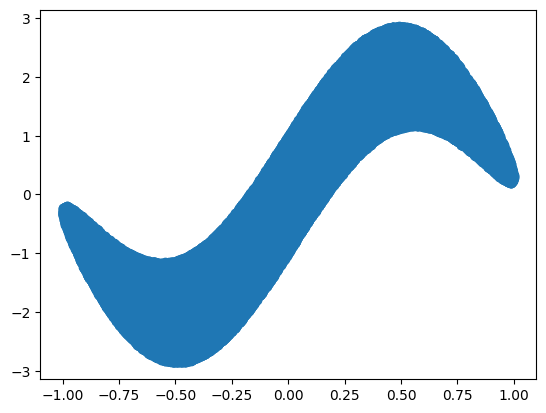

In [57]:
def generate_wave(n=100000, device='cpu'):
    train_loader = generate_ellipse(n, (1,1), device)
    train_loader[:, 1] = train_loader[:,1] + 2*torch.sin(3*train_loader[:,0])
    return train_loader
training_set = generate_wave(n=100000, device=device)
validation_set = generate_wave(n=10000, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [34]:
model_wave = NN(num_coupling_layers=30, split_size_x1=1, nn_size=(1, 10)).to(device)


In [35]:
optimizer = torch.optim.SGD(model_wave.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [36]:
%%time

for epoch in range(num_epoch):
    training_routine(model_wave, train_loader, optimizer, gaussian_loss_function) 
    print(testing_routine(model_wave, validation_loader, gaussian_loss_function))
    scheduler.step()

77it [00:09,  8.36it/s]
62it [00:02, 30.87it/s]


tensor(7067.7487, device='cuda:0')


77it [00:09,  7.97it/s]
62it [00:02, 29.82it/s]


tensor(6098.4795, device='cuda:0')


77it [00:09,  7.90it/s]
62it [00:02, 30.03it/s]


tensor(5639.6512, device='cuda:0')


77it [00:09,  7.96it/s]
62it [00:02, 30.21it/s]


tensor(5986.3979, device='cuda:0')


77it [00:09,  7.91it/s]
62it [00:02, 29.74it/s]


tensor(5071.1887, device='cuda:0')


77it [00:09,  7.99it/s]
62it [00:02, 29.98it/s]


tensor(5056.7384, device='cuda:0')


77it [00:09,  7.93it/s]
62it [00:02, 30.82it/s]


tensor(4888.2624, device='cuda:0')


77it [00:09,  7.91it/s]
62it [00:01, 31.09it/s]


tensor(4842.6440, device='cuda:0')


77it [00:09,  8.01it/s]
62it [00:01, 31.28it/s]


tensor(4760.0495, device='cuda:0')


77it [00:09,  8.30it/s]
62it [00:02, 30.41it/s]


tensor(4583.2118, device='cuda:0')


77it [00:09,  8.12it/s]
62it [00:02, 29.40it/s]


tensor(4785.5640, device='cuda:0')


77it [00:09,  7.84it/s]
62it [00:02, 29.98it/s]


tensor(4720.8293, device='cuda:0')


77it [00:09,  7.87it/s]
62it [00:02, 29.85it/s]


tensor(5151.1707, device='cuda:0')


77it [00:09,  8.08it/s]
62it [00:02, 30.08it/s]


tensor(4681.0789, device='cuda:0')


77it [00:09,  8.02it/s]
62it [00:02, 30.10it/s]


tensor(4528.8904, device='cuda:0')


77it [00:09,  7.94it/s]
62it [00:02, 30.39it/s]


tensor(4386.5361, device='cuda:0')


77it [00:10,  7.66it/s]
62it [00:02, 30.77it/s]


tensor(4265.0026, device='cuda:0')


77it [00:09,  7.85it/s]
62it [00:02, 30.01it/s]


tensor(4428.3185, device='cuda:0')


77it [00:10,  7.56it/s]
62it [00:01, 31.49it/s]


tensor(4411.5573, device='cuda:0')


77it [00:09,  7.79it/s]
62it [00:02, 30.35it/s]

tensor(4190.4624, device='cuda:0')
CPU times: total: 4min 43s
Wall time: 3min 54s


0

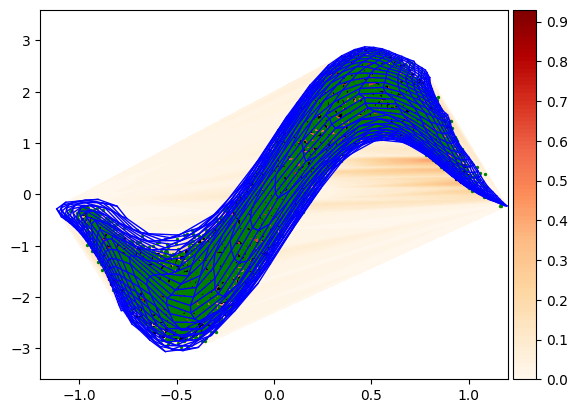

In [60]:
scale=1.2
factor=3.2

sampling_data = torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model_wave, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-1*scale,1*scale), y_lim=(-3*scale,3*scale),
                                density_function=compute_gaussian_density)

In [51]:
sampling_data = generate_ellipse(10900, (1, 1), device=device) 

with torch.no_grad():
    transformed = model_wave(model_circle(sampling_data), reverse=True)

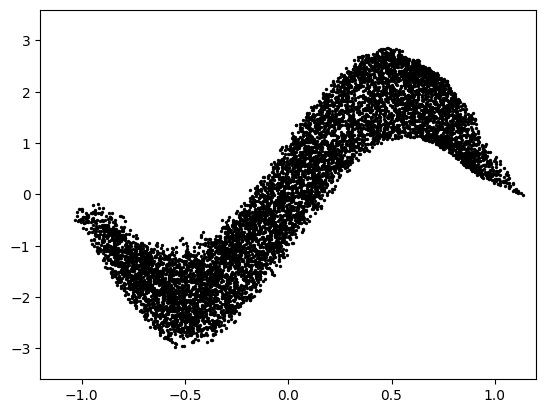

In [55]:
transformed = transformed.detach().to('cpu')

factor = 1
scale = 1.2

x_range=(-factor, factor)
y_range=(-factor, factor)
x_lim=(-scale,scale)
y_lim=(-3*scale,3*scale)

fig, ax = plt.subplots()

plt.xlim(*x_lim)
plt.ylim(*y_lim)

ax.scatter(transformed[:,0], transformed[:,1], c='black', alpha=1, s=2)

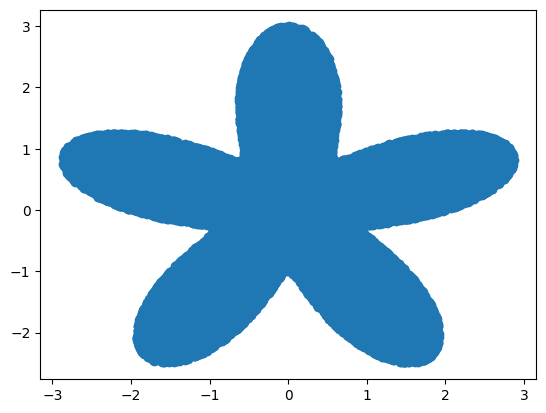

In [40]:
def generate_star(max_num = 10000, n_edges = 5, device='cpu'):
    data = generate_ellipse(max_num, scale=(3,3), device=device)
    angles = torch.arctan2(data[:,1],data[:,0])
    max_amplitude = torch.sin(n_edges*angles)+2
    amplitude = torch.sum(data**2,axis=1)**0.5
    data = data[amplitude <= max_amplitude]
    return data

training_set = generate_star(max_num=100000, n_edges=5, device=device)
validation_set = generate_star(max_num=10000, n_edges=5, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [42]:
model_star = NN(num_coupling_layers=30, split_size_x1=1, nn_size=(1, 10)).to(device)


In [43]:
optimizer = torch.optim.SGD(model_star.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [44]:
%%time

for epoch in range(num_epoch):
    training_routine(model_star, train_loader, optimizer, gaussian_loss_function) 
    print(testing_routine(model_star, validation_loader, gaussian_loss_function))
    scheduler.step()

39it [00:05,  7.62it/s]
32it [00:01, 31.87it/s]


tensor(9783.2954, device='cuda:0')


39it [00:04,  7.93it/s]
32it [00:01, 31.78it/s]


tensor(9716.7139, device='cuda:0')


39it [00:04,  7.91it/s]
32it [00:01, 31.28it/s]


tensor(9219.5791, device='cuda:0')


39it [00:04,  8.03it/s]
32it [00:01, 30.74it/s]


tensor(9017.3726, device='cuda:0')


39it [00:04,  7.87it/s]
32it [00:01, 31.68it/s]


tensor(8892.2069, device='cuda:0')


39it [00:04,  8.09it/s]
32it [00:01, 31.43it/s]


tensor(8791.6966, device='cuda:0')


39it [00:05,  7.74it/s]
32it [00:01, 32.00it/s]


tensor(8794.8227, device='cuda:0')


39it [00:05,  7.73it/s]
32it [00:01, 31.04it/s]


tensor(8674.8783, device='cuda:0')


39it [00:04,  8.01it/s]
32it [00:01, 31.43it/s]


tensor(8692.9835, device='cuda:0')


39it [00:04,  7.87it/s]
32it [00:01, 30.27it/s]


tensor(8675.5275, device='cuda:0')


39it [00:05,  7.61it/s]
32it [00:01, 30.65it/s]


tensor(8675.6926, device='cuda:0')


39it [00:05,  7.74it/s]
32it [00:01, 30.56it/s]


tensor(8510.4424, device='cuda:0')


39it [00:05,  7.68it/s]
32it [00:01, 30.33it/s]


tensor(8539.8508, device='cuda:0')


39it [00:05,  7.65it/s]
32it [00:01, 31.43it/s]


tensor(8486.4415, device='cuda:0')


39it [00:04,  7.97it/s]
32it [00:01, 31.56it/s]


tensor(8546.9675, device='cuda:0')


39it [00:04,  8.04it/s]
32it [00:01, 31.31it/s]


tensor(8443.0172, device='cuda:0')


39it [00:04,  7.85it/s]
32it [00:01, 31.59it/s]


tensor(8474.7002, device='cuda:0')


39it [00:04,  7.99it/s]
32it [00:01, 30.65it/s]


tensor(8454.3903, device='cuda:0')


39it [00:05,  7.70it/s]
32it [00:01, 30.53it/s]


tensor(8411.0858, device='cuda:0')


39it [00:05,  7.62it/s]
32it [00:01, 30.74it/s]

tensor(8466.1630, device='cuda:0')
CPU times: total: 2min 50s
Wall time: 2min


0

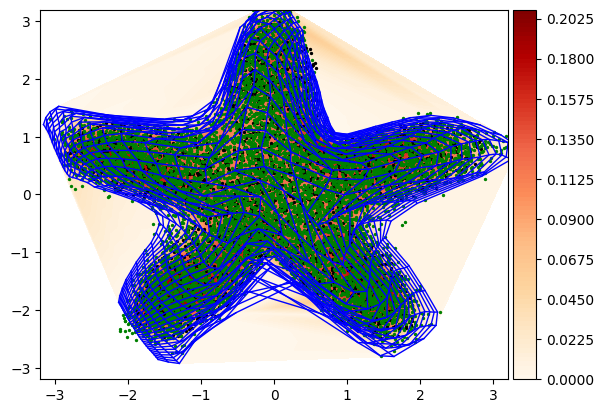

In [45]:
scale=3.2
factor=3

sampling_data = torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model_star, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-1*scale,1*scale), y_lim=(-1*scale,1*scale),
                                density_function=compute_gaussian_density)

In [46]:
sampling_data = generate_ellipse(10900, (1, 1), device=device) 

with torch.no_grad():
    transformed = model_star(model_circle(sampling_data), reverse=True)

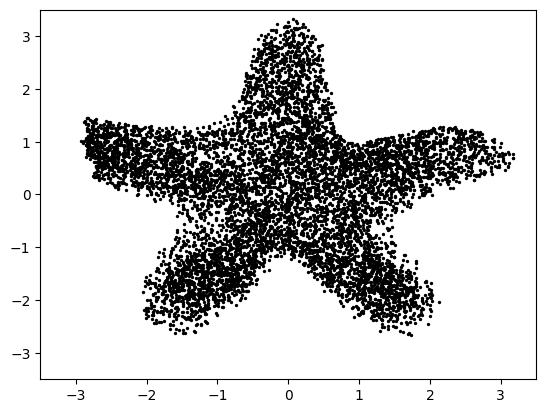

In [50]:
transformed = transformed.detach().to('cpu')

factor = 1
scale = 3.5

x_range=(-factor, factor)
y_range=(-factor, factor)
x_lim=(-scale,scale)
y_lim=(-scale,scale)

fig, ax = plt.subplots()

plt.xlim(*x_lim)
plt.ylim(*y_lim)

ax.scatter(transformed[:,0], transformed[:,1], c='black', alpha=1, s=2)